# Домашнее задание №4. Генетические алгоритмы

В этом домашнем задании тренируемся в использовании модуля DEAP. Ничего нового придумывать не придется, но нужно разобраться, как при помощи него сделать то же самое, что делали в примерах на лекции и семинаре.

## Задание 1

Ниже приведен код с лекции, решающий следующую задачу:
 
Найти максимум следующей функции:

$ f(x) = x \sin(10 \pi x) + 1$ на интервале: $x \in [0, 1]$

Поколение 10: Лучшее значение функции приспособленности = 1.8505
Поколение 20: Лучшее значение функции приспособленности = 1.8506
Поколение 30: Лучшее значение функции приспособленности = 1.8506
Поколение 40: Лучшее значение функции приспособленности = 1.8506
Поколение 50: Лучшее значение функции приспособленности = 1.8506
Поколение 60: Лучшее значение функции приспособленности = 1.8506
Поколение 70: Лучшее значение функции приспособленности = 1.8506
Поколение 80: Лучшее значение функции приспособленности = 1.8506
Поколение 90: Лучшее значение функции приспособленности = 1.8506
Поколение 100: Лучшее значение функции приспособленности = 1.8506


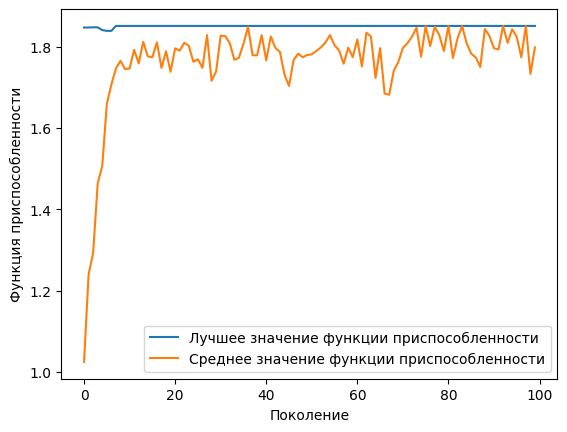

Оптимальное значение x = 0.8512
Максимум функции = 1.8506


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(42)
# Параметры GA
POPULATION_SIZE = 50
GENERATIONS = 100
CHROMOSOME_LENGTH = 16  # Количество бит для кодирования x
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.01

# Функция для оптимизации (фитнесс функция или функция приспособленности) - дана по условию задачи
def fitness_function(x):
    return x * np.sin(10 * np.pi * x) + 1

# Декодирование бинарной хромосомы в число x
def decode_chromosome(chromosome):
    max_value = 2**CHROMOSOME_LENGTH - 1                             # Максимальное возможное значение для хромосомы
    decimal_value = int(''.join(str(bit) for bit in chromosome), 2)  # Второй аргумент int() - система счисления
    x = decimal_value / max_value                                    # Нормализация в диапазон [0,1]
    return x

# Инициализация популяции
def initialize_population():
    return np.random.randint(0, 2, (POPULATION_SIZE, CHROMOSOME_LENGTH))    # Создание массива случайных битов


"""
Оценка фитнеса популяции
Оценивает фитнес всех особей в популяции.
Для каждой хромосомы вычисляется значение x, а затем фитнес-функция.
"""
def evaluate_fitness(population):
    fitness = []
    for chromosome in population:
        x = decode_chromosome(chromosome)        # Декодирование хромосомы
        fitness.append(fitness_function(x))      # Вычисление фитнеса
    return np.array(fitness)                     # Преобразование списка в массив numpy


"""
Отбор (турнирный)
Выполняет отбор особей из популяции на основе их фитнеса с использованием турниров.
Каждая пара особей случайно выбирается, и более фитнесная особь переходит в новую популяцию.
"""
def selection(population, fitness):
    new_population = []
    for _ in range(POPULATION_SIZE):
        i, j = np.random.randint(0, POPULATION_SIZE, 2)         # Случайный выбор индексов для турнира
        if fitness[i] > fitness[j]:
            winner = population[i]                              # Победитель определён по фитнесу
        else:
            winner = population[j]
        new_population.append(winner)                           # Добавление победителя в новую популяцию
    return np.array(new_population)                             # Преобразование списка в массив numpy

# Кроссовер (одноточечный)
def crossover(population):
    new_population = []
    for i in range(0, POPULATION_SIZE, 2):
        parent1 = population[i]                                                 # Первый родитель
        parent2 = population[i + 1]                                             # Второй родитель
        if np.random.rand() < CROSSOVER_RATE:
            point = np.random.randint(1, CHROMOSOME_LENGTH - 1)                 # Случайно выбираем точку скрещивания
            child1 = np.concatenate((parent1[:point], parent2[point:]))         # Первая половина первого родителя и вторая половина второго
            child2 = np.concatenate((parent2[:point], parent1[point:]))         # Первая половина второго родителя и вторая половина первого
            new_population.extend([child1, child2])
        else:                                                                   # Если скрещивание не произошло, добавляем родительские хромосомы в новое поколение
            new_population.extend([parent1, parent2])
    return np.array(new_population)

# Мутация
def mutation(population):
    for chromosome in population:                           # Проходим по всем хромосомам в поколении
        for i in range(CHROMOSOME_LENGTH):                  # Проходим по каждому гену в хромосоме
            if np.random.rand() < MUTATION_RATE:            # Случайным образом решаем, произойдет ли мутация гена
                chromosome[i] = 1 - chromosome[i]           # Изменяем ген на противоположный
    return population

# Главный цикл GA
population = initialize_population()
best_fitness_history = []
mean_fitness_history = []

for generation in range(GENERATIONS):
    fitness = evaluate_fitness(population)      # Оценка приспособленности текущего населения
    best_fitness = np.max(fitness)              # Нахождение максимальной приспособленности
    mean_fitness = np.mean(fitness)             # Нахождение средней приспособленности
    best_fitness_history.append(best_fitness)   # Сохранение максимальной приспособленности для анализа
    mean_fitness_history.append(mean_fitness)   # Сохранение средней приспособленности для анализа

    # Вывод прогресса
    if (generation+1) % 10 == 0:
        print(f'Поколение {generation+1}: Лучшее значение функции приспособленности = {best_fitness:.4f}')

    # Отбор
    population = selection(population, fitness)
    # Кроссовер
    population = crossover(population)
    # Мутация
    population = mutation(population)

# Отображение результатов
plt.plot(best_fitness_history, label='Лучшее значение функции приспособленности')
plt.plot(mean_fitness_history, label='Среднее значение функции приспособленности')
plt.xlabel('Поколение')
plt.ylabel('Функция приспособленности')
plt.legend()
plt.show()

# Вывод наилучшего решения
best_index = np.argmax(fitness)
best_chromosome = population[best_index]
best_x = decode_chromosome(best_chromosome)
print(f'Оптимальное значение x = {best_x:.4f}')
print(f'Максимум функции = {fitness_function(best_x):.4f}')

Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

**РЕШЕНИЕ**

In [42]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [43]:
# константы задачи
ONE_MAX_LENGTH = 100    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
POPULATION_SIZE = 50    # количество индивидуумов в популяции
P_CROSSOVER = 0.7       # вероятность скрещивания (кроссовера)
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений

# Установка начального состояния генератора случайных чисел для повторяемости
random.seed(42)

In [44]:
# Определение функции приспособленности (целевой функции)
def func(individual):
    # Извлечение значения x из индивида
    x = individual[0] 
    # Возвращаемое значение – результат функции
    return x * np.sin(10 * np.pi * x) + 1,

In [45]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))      # Создание класса FitnessMax для задачи максимизации
creator.create("Individual", list, fitness=creator.FitnessMax)  # Создание класса Individual, представляющего индивидуальное решение

# Инициализация инструментов генетического алгоритма
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, 0, 1)                        # Генерация случайного числа в диапазоне [0, 1] как атрибута
toolbox.register("individual", tools.initRepeat, creator.Individual,        # Создание индивида, состоящего из одного атрибута
                 toolbox.attr_float, 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Создание популяции из индивидов


toolbox.register("evaluate", func)                                          # Регистрация функции оценки (фитнес-функции)
toolbox.register("select", tools.selTournament, tournsize=3)                # Регистрация отбора с использованием турнирного отбора (кол-во особей для турнирного отбора)
toolbox.register("mate", tools.cxBlend, alpha=0.5)                          # Регистрация кроссовера (скрещивания) с использованием метода Blend
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)      # Регистрация мутации с использованием гауссовского распределения


# Инициализация начальной популяции
pop = toolbox.population(n=POPULATION_SIZE)
# Определение статистики для мониторинга прогресса
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)  # Среднее значение приспособленности
stats.register("max", np.max)   # Максимальное значение

# Запуск процесса эволюции на 40 поколений
pop, log = algorithms.eaSimple(pop, toolbox, 
                                cxpb=P_CROSSOVER,  # Вероятность применения кроссовера
                                mutpb=P_MUTATION,  # Вероятность применения мутации
                                ngen=MAX_GENERATIONS, 
                                stats=stats,   # Статистика
                                verbose=True)  # Вывод на экран


# Поиск и вывод наилучшего решения (индивида)
best_ind = tools.selBest(pop, 1)[0]
print("===========================================================================")
print(f'Лучшее решение: {best_ind}, значение функции: {best_ind.fitness.values[0]}')

gen	nevals	avg    	max    
0  	50    	1.01886	1.84487
1  	44    	1.21792	1.85022
2  	39    	1.26387	1.85022
3  	35    	1.38494	1.87432
4  	36    	1.4803 	1.87432
5  	34    	1.53654	1.85057
6  	44    	1.83842	1.85057
7  	40    	1.84982	1.85059
8  	40    	1.85041	1.8506 
9  	33    	1.85056	1.8506 
10 	39    	1.85058	1.8506 
11 	39    	1.83358	1.8506 
12 	44    	1.85059	1.8506 
13 	35    	1.85059	1.8506 
14 	37    	1.8506 	1.8506 
15 	41    	1.8506 	1.8506 
16 	35    	1.8506 	1.8506 
17 	39    	1.8506 	1.8506 
18 	39    	1.8506 	1.8506 
19 	39    	1.83358	1.8506 
20 	41    	1.83358	1.8506 
21 	42    	1.8506 	1.8506 
22 	43    	1.8506 	1.8506 
23 	37    	1.8506 	1.8506 
24 	43    	1.8506 	1.8506 
25 	35    	1.8506 	1.8506 
26 	46    	1.8506 	1.8506 
27 	45    	1.8506 	1.8506 
28 	33    	1.8506 	1.8506 
29 	39    	1.8506 	1.8506 
30 	33    	1.83358	1.8506 
31 	45    	1.8506 	1.8506 
32 	37    	1.8506 	1.8506 
33 	41    	1.8506 	1.8506 
34 	39    	1.83358	1.8506 
35 	28    	1.8506 	1.8506 
3

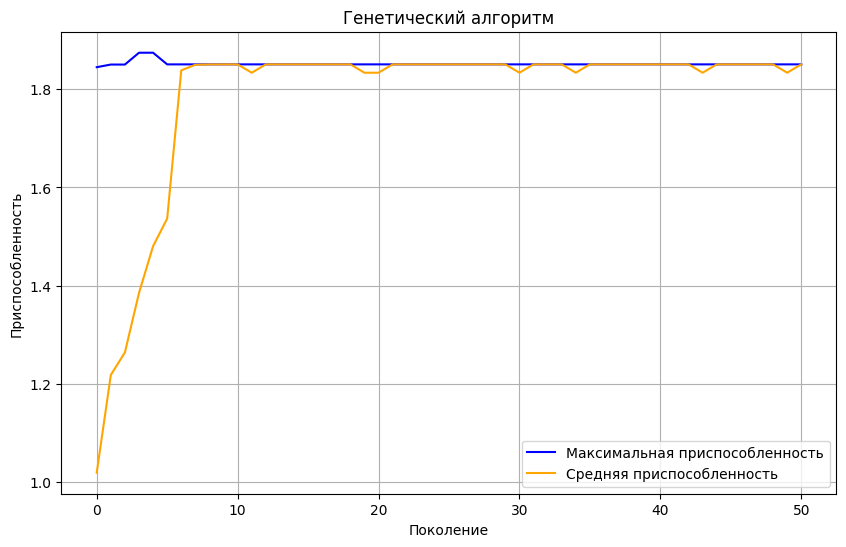

In [46]:
# Предполагается, что log уже содержит данные о поколениях и приспособленностях
gen = log.select("gen")
fit_max = log.select("max")
fit_avg = log.select("avg")

# Создаем график
plt.figure(figsize=(10, 6))
plt.plot(gen, fit_max, label='Максимальная приспособленность', color='blue')
plt.plot(gen, fit_avg, label='Средняя приспособленность', color='orange', linestyle='-')

# Настройка графика
plt.xlabel('Поколение')
plt.ylabel('Приспособленность')
plt.title('Генетический алгоритм')
plt.legend(loc='best')
plt.grid(True)

# Показать график
plt.show()

## Задание 2

Ниже приведен код с семинара, решающий следующую задачу:
 
**Задание**:
Двое нашли клад, в котором находятся бриллианты разного размера (и, соответственно, разной цены). Им нужно разделить сокровище на две части таким образом, чтобы разница в цене была равна 0 (или минимальна).

**Формальное определение**:
У нас есть множество чисел $S$. Нам нужно разделить его на два подмножества $S_1$ и $S_2$, так что $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ и $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Для начала определим множество $S$:

[ 3215  8753  9964  6216   297  9053  7900   855  6343  6181  2052  7041
  6994  9004  2258  1894  7176  1934  6025  5764  3173  5622  7153   950
  3903  3802  1508  9644   165  3722  6768  8786  9307   751   245  4095
   932  1256   929  2077  7186  2959  4631   717  5147  5729  9870  4002
  4791  2126  9931  6518  7844  2006  1259  1252  4100  8908  3373  8109
  5849  3610  7267  4960  6012  9035  4796  4002  8632  4384  5225  8871
  8249  1711   885  5680  6732  7967  4584  1286  3336  2247  8536  3778
  4997  9060  3454  2012  6102  2326   588  3852  7214  7435  1872   349
  8175   554  4429  4555  9638  6295  4922  1385   979  4573  9991  6291
  8116   309  6269  6303  7275   728  3678  3371  6215  3022  7063  8725
   857  5000   513  8873  5699   426  9974  5509  4302  9683  3548   449
  5587  7112  7005   936  1790  9066  6359  4710  8762  7595  6945  9382
  9312  8502  4262  2664  6248  7657  3904  2161   249  4599  4496  1402
  4095  8894  4847  5531  9357  6466   633  4494  5

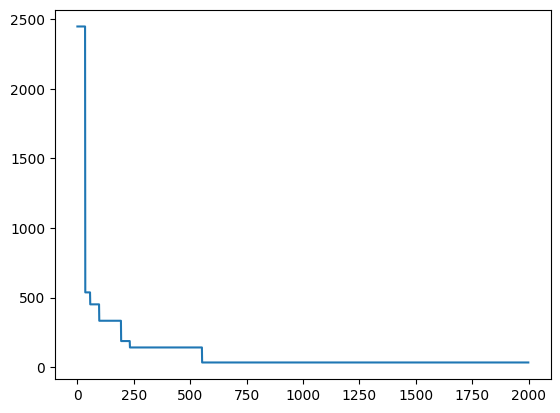

In [47]:
import random

N = 200
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

def generate(S):
    return np.array([random.randint(0, 1) for _ in S])

def fit(B, S = S):
    c1 = (B * S).sum()
    c2 = ((1 - B) * S).sum()
    return abs(c1 - c2)

def mutate(b):
    x = b.copy()
    i = random.randint(0, len(b) - 1)
    x[i] = 1 - x[i]
    return x

def xover(b1, b2):
    x = generate(b1)
    return b1 * x + b2 * (1 - x)

pop_size = 30
P = [generate(S) for _ in range(pop_size)]

def evolve(P, S = S, n = 2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f == 0:
            break
        if random.randint(1, 10) < 3:
            i = random.randint(0, len(P) - 1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0, len(P)-1)
            j = random.randint(0, len(P)-1)
            b = xover(P[i], P[j])
            if fit(b) < fit(P[i]):
                P[i] = b
            elif fit(b) < fit(P[j]):
                P[j] = b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i], res)

(s, hist) = evolve(P)

print(s, fit(s))
plt.plot(hist)
plt.show()

Перепишите код так, чтобы в нем использовалось как можно больше функционала из модуля DEAP.

**Решение**

In [48]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [49]:
# константы задачи
ONE_MAX_LENGTH = 200    # длина подлежащей оптимизации битовой строки

# константы генетического алгоритма
P_CROSSOVER = 0.5        # вероятность скрещивания (кроссовера)
P_MUTATION = 0.2          # вероятность мутации индивидуума
MAX_GENERATIONS = 2000    # максимальное количество поколений
POPULATION_SIZE = 30

[1940 9860 6406 5187 4321  624 6505 7174  874 7728 7490 1783 4235 6683
 3158 5130 4283 3003 6882 3781 3266 6109 5593 7350 4995 3827 3941 8830
 6740 9454 5157 2024 3516 3843 4529 9308 6333 1972  238 4226 6584 4178
 8080 5758  634 9606 8709 6446 3652 7338 7759 4014 8974 3536 2533 9655
 1222 1474 6467 9303 6111 8293 3473 8450 5689 9295 8339 3891 3330 4552
 6476 3621 5810  172 6757 1184 4518 5909 7828 1253 7137 5440 1874 4748
 7635  388 7354  212 7523 3676 2301 4002 5997   71 4525 7175 6937 4277
 8521 1252 9706 8665 1613 3283 5113 2884 7608 8683 6590 4796 4282 4201
 1310 7718 9364 5710 8844   91 9167 2592 3464 3210 7552  608 7254 6726
 6262 5335 1189 5624 1157 3101 9459 2819 2069 1766 6354 3781 1452 1232
 3189 2214 1378 7260 6371 1074 8329 5797 1612 7649 8823 2449 9092 4788
 9433 4502 8606 4452  420 8922  299 1613 6675 5124 4116 4504 1978 7010
 8145 1753 8575 4369 5268 5382 9089 4046 1632 9173 5939 3259 1957 6652
 6110 7127 8336 8739  712 6954 5115 4593 8875 6362 9556 8178 2634 1767
 1615 

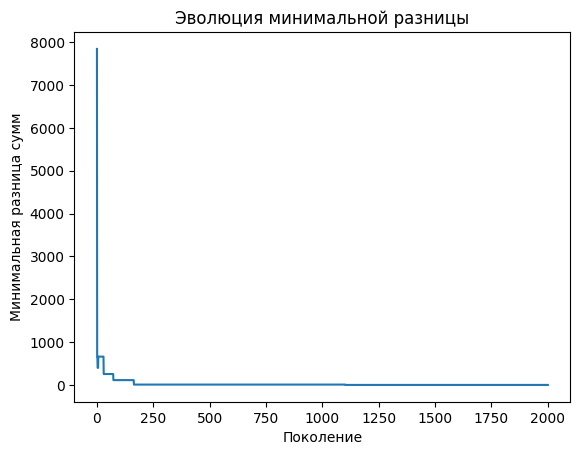

Лучшее решение: [0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
Минимальная разница сумм: 4


In [50]:
# Инициализация массива S
N = 200
S = np.array([random.randint(1, 10000) for _ in range(N)])
print(S)

# Определение фитнес-функции
def fitness_function(individual, S=S):
    c1 = sum([val for i, val in enumerate(S) if individual[i] == 1])
    c2 = sum([val for i, val in enumerate(S) if individual[i] == 0])
    return abs(c1 - c2),

# Создание классов для индивидов и их фитнеса
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Инициализация инструментов
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Регистрация функций мутации, скрещивания и оценки
toolbox.register("evaluate", fitness_function)                                           # Регистрация функции оценки (фитнес-функции)
toolbox.register("select", tools.selTournament, tournsize=3)                # Регистрация отбора с использованием турнирного отбора (кол-во особей для турнирного отбора)
toolbox.register("mate", tools.cxUniform, indpb=0.5)                        # Регистрация кроссовера (скрещивания) с использованием метода Blend
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/N)                   # Регистрация мутации с использованием гауссовского распределения


# Инициализация популяции
population = toolbox.population(n=POPULATION_SIZE)

# Запуск алгоритма с максимальным использованием deap
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
logbook = tools.Logbook()
logbook.header = ["gen", "min"]

# Запуск процесса эволюции на 40 поколений
population, logbook = algorithms.eaSimple(population, toolbox, 
                                cxpb=P_CROSSOVER,  # Вероятность применения кроссовера
                                mutpb=P_MUTATION,  # Вероятность применения мутации
                                ngen=MAX_GENERATIONS, 
                                stats=stats,  # Статистика
                                halloffame=tools.HallOfFame(1), 
                                verbose=True)  # Вывод на экран

# Извлечение минимальных значений фитнеса по поколениям
fitness_history = logbook.select("min")

# Построение графика минимальной ошибки
plt.plot(fitness_history)
plt.xlabel("Поколение")
plt.ylabel("Минимальная разница сумм")
plt.title("Эволюция минимальной разницы")
plt.show()

# Вывод лучшего решения
best_individual = tools.selBest(population, 1)[0]
best_fitness = fitness_function(best_individual)[0]
print(f"Лучшее решение: {best_individual}")
print(f"Минимальная разница сумм: {best_fitness}")